Total sum of infant: 4142
Total sum of toddler: 12331
Total sum of preschool: 25787
Total sum of kindergarten: 15156
Total sum of one_up: 23026
Total sum of all_age: 80442


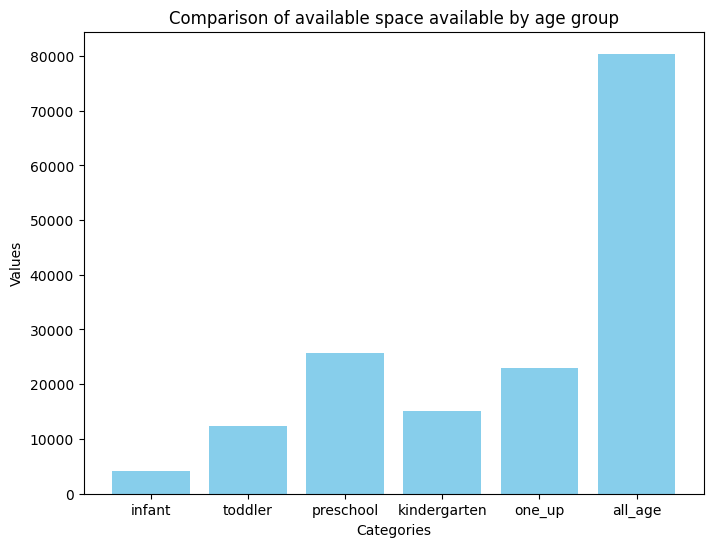

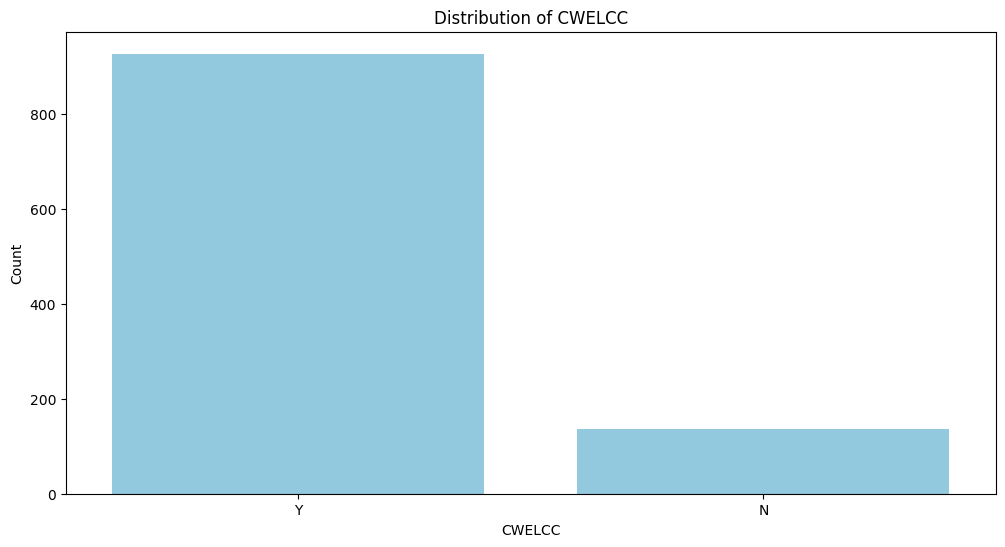

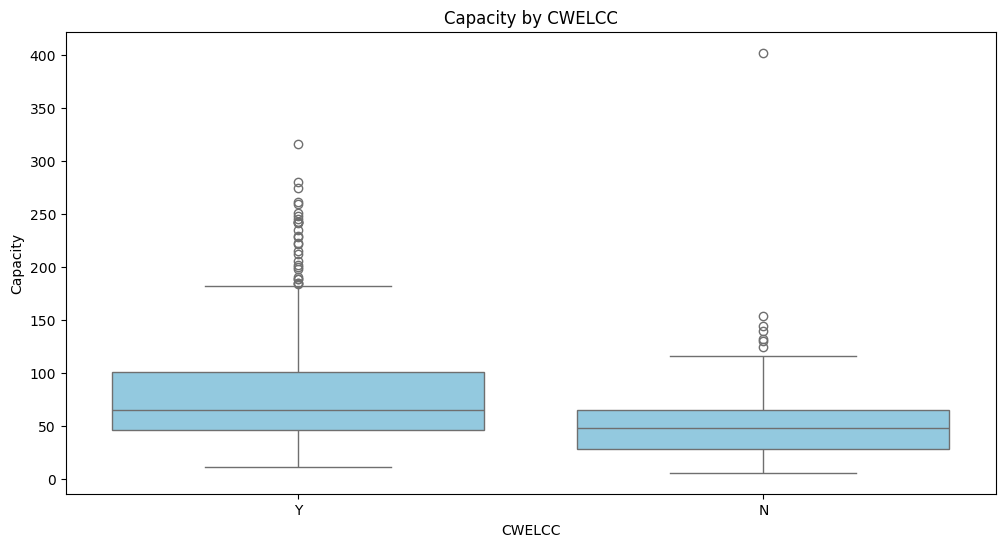

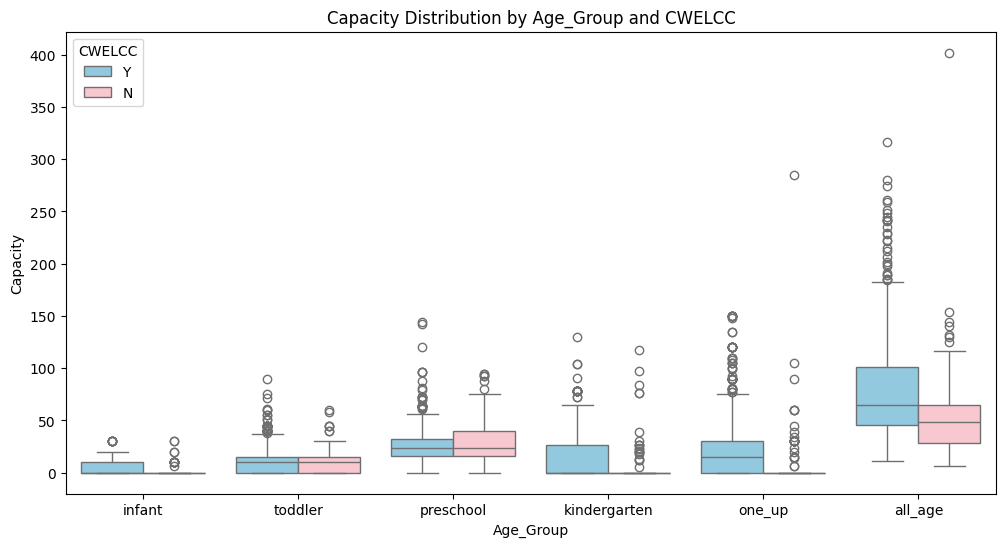

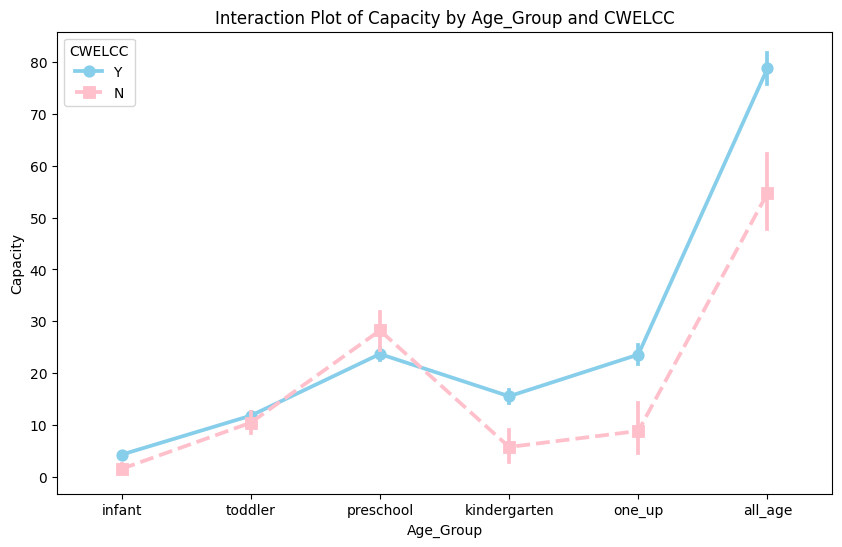

One-way ANOVA for Age_Group: F_onewayResult(statistic=188.19076811803401, pvalue=4.517382641202681e-151)
One-way ANOVA for CWELCC: F_onewayResult(statistic=37.29824359313004, pvalue=1.073456588960706e-09)
Two-way ANOVA results:
                         sum_sq      df            F        PR(>F)
Age_Group         3.528741e+06     5.0  1042.897314  0.000000e+00
CWELCC            4.621801e+04     1.0    68.297212  1.695657e-16
Age_Group:CWELCC  6.406837e+04     5.0    18.935005  9.692748e-19
Residual          4.307992e+06  6366.0          NaN           NaN


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import piplite
await piplite.install('seaborn')
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install openpyxl
from bioinfokit.analys import stat
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# load data file
df = pd.read_excel("INF2178_A2_data.xlsx")

# Drop irrelevant columns
df.drop(columns=['LOC_ID', 'BLDGNAME', 'ADDRESS', 'PCODE'], inplace=True)

# replace column names
df = df.rename(columns={'_id':'id', 'LOC_NAME':'NAME', 'AUSPICE':'auspice', 'IGSPACE':'infant', 'TGSPACE':'toddler', 'PGSPACE':'preschool', 'KGSPACE':'kindergarten', 'SGSPACE':'one_up', 'TOTSPACE':'all_age', 'cwelcc_flag':'CWELCC'})

# Data exploration to check the distribution by different variables
# Calculating total capacities
infant_total = df['infant'].sum()
toddler_total = df['toddler'].sum()
preschool_total = df['preschool'].sum()
kindergarten_total = df['kindergarten'].sum()
one_up_total = df['one_up'].sum()
all_age_total = df['all_age'].sum()

print("Total sum of infant:", infant_total)
print("Total sum of toddler:", toddler_total)
print("Total sum of preschool:", preschool_total)
print("Total sum of kindergarten:", kindergarten_total)
print("Total sum of one_up:", one_up_total)
print("Total sum of all_age:", all_age_total)

# Create a simple graph to understand the general distribution of availabel space by age group
values = [infant_total, toddler_total, preschool_total, kindergarten_total, one_up_total, all_age_total]
labels = ['infant', 'toddler', 'preschool', 'kindergarten', 'one_up', 'all_age']
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of available space available by age group')
plt.show()

# Check the distribution of categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='CWELCC', color = 'skyblue')
plt.title('Distribution of CWELCC')
plt.xlabel('CWELCC')
plt.ylabel('Count')
plt.show()

# Boxplot of Capacity by CWELCC
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CWELCC', y='all_age', color = 'skyblue')
plt.title('Capacity by CWELCC')
plt.xlabel('CWELCC')
plt.ylabel('Capacity')
plt.show()

# ANOVA PREP
# Melt the DataFrame to convert it from wide to long format
df_long = pd.melt(df, id_vars=['NAME','CWELCC'], value_vars=['infant', 'toddler', 'preschool', 'kindergarten', 'one_up', 'all_age'], 
                   var_name='Age_Group', value_name='Capacity')


# Boxplot for Capacity by Age_Group
custom_palette = {'Y': 'skyblue', 'N': 'pink'}
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x='Age_Group', y='Capacity', hue='CWELCC', palette=custom_palette)
plt.title('Capacity Distribution by Age_Group and CWELCC')
plt.xlabel('Age_Group')
plt.ylabel('Capacity')
plt.show()

# Create interaction plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_long, x='Age_Group', y='Capacity', hue='CWELCC', markers=['o', 's'], linestyles=['-', '--'], palette=custom_palette)
plt.title('Interaction Plot of Capacity by Age_Group and CWELCC')
plt.xlabel('Age_Group')
plt.ylabel('Capacity')
plt.legend(title='CWELCC')
plt.show()

# One-way ANOVA for Age_Group
anova_age_group = f_oneway(df_long['Capacity'][df_long['Age_Group'] == 'infant'],
                           df_long['Capacity'][df_long['Age_Group'] == 'toddler'],
                           df_long['Capacity'][df_long['Age_Group'] == 'preschool'],
                          df_long['Capacity'][df_long['Age_Group'] == 'kindergarten'],
                          df_long['Capacity'][df_long['Age_Group'] == 'one_up'])

# One-way ANOVA for CWELCC
anova_cwelcc = f_oneway(df_long['Capacity'][df_long['CWELCC'] == 'Y'],
                        df_long['Capacity'][df_long['CWELCC'] == 'N'])

print("One-way ANOVA for Age_Group:", anova_age_group)
print("One-way ANOVA for CWELCC:", anova_cwelcc)

# Two-way ANOVA
model = ols('Capacity ~ Age_Group * CWELCC', data=df_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Two-way ANOVA results:\n", anova_table)